# Data Mining Assignment 2_[DT,NB]

## Student Details

VIGNESH MANIKANDAN - 1002012757

## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load dataset_DT_NB.csv  [1 points]

### Features:

* Age | Objective Feature | age |
* Height | Objective Feature | height | 
* Weight | Objective Feature | weight | 
* Gender | Objective Feature | gender |  
* Systolic blood pressure | Examination Feature | ap_hi | 
* Diastolic blood pressure | Examination Feature | ap_lo | 
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | 
* Alcohol intake | Subjective Feature | alco | 
* Physical activity | Subjective Feature | active | 
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

Split your dataset 75% for training, and 25% for testing the classifier.  [2 points]

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [6]:
df_dt=pd.read_csv('dataset_DT_NB1.csv') # loading dataset
le = preprocessing.LabelEncoder()
df_dt = df_dt.apply(le.fit_transform)

In [16]:
# Information of dataset
print (">>Task 1-a: Details of df_dt data frame are: \n", ) 
df_dt.info()

>>Task 1-a: Details of df_dt data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [11]:
df_dt.isnull().sum() #number of null values are checked in each column to check if we need to handle null values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [17]:
X = df_dt.loc[:,df_dt.columns != 'cardio']   #Getting all the data except cardio columns
y = df_dt.loc[:,'cardio']  #cardio is target variable.

# Training,validation and testing the dataset by splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=25)           #Splitting data into 75% training and 25% into testing


Training DataSet size
(52500, 12)
Testing DataSet size
(17500, 12)


# DecisionTree (15 Points)

1) Use gini and entropy to measure the quality of a split.  [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Determine four most influential attributes on target attribute (with explanation) [5 points]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. [2 points]



In [18]:
# mdr 4,5,6
mdr = list(range(3, 6))

# List to store the accuracy for each max_depth
acc = []

#accuracy scores for different ds are printed.
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d)         #Applying Gini to measure the quality of the split
    gini.fit(X_train, y_train)
    Y_p_gini = gini.predict(X_test)
    print("acc score of Gini for d ",d,"=",accuracy_score(y_test,Y_p_gini))  # printing accuracy score

acc score of Gini for d  3 = 0.7261142857142857
acc score of Gini for d  4 = 0.7273142857142857
acc score of Gini for d  5 = 0.7298285714285714


In [19]:
# mdr 4,5,6
mdr = list(range(4, 7))

# List to store the accuracy for each max_depth
acc = []

#accuracy scores for different ds are printed.
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion = "entropy")    #Applying Entropy to measure quality
    entropy.fit(X_train, y_train)
    Y_p_ent= entropy.predict(X_test)
    print("acc score of Entropy for d ",d,"=",accuracy_score(y_test,Y_p_ent)) # printing acc score
   

acc score of Entropy for d  4 = 0.7273142857142857
acc score of Entropy for d  5 = 0.7272
acc score of Entropy for d  6 = 0.7281714285714286


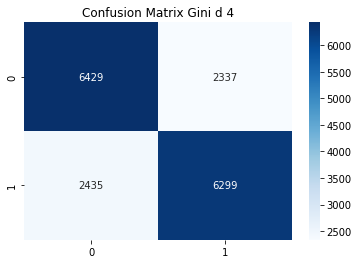

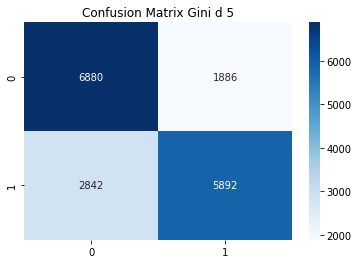

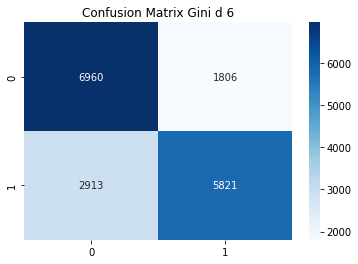

In [15]:
# mdr 4,5,6
mdr = list(range(4, 7))
cf_matrix = []

#confusion matric for different ds are calculated (GINI).
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    Y_p_gini = gini.predict(X_test)
    cf_matrix = confusion_matrix(y_test,Y_p_gini)
        
    gl = ["True Negative","False Positive","False Negative","True Positive"]

    gcnt = ['{0:0.0f}'.format(value) for value in
                        cf_matrix.flatten()]
    gpercent = ['{0:.2%}'.format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
    l = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
                  zip(gl,gcnt,gpercent)]
    l = np.asarray(l).reshape(2,2)
    plt.title("Confusion Matrix Gini d "+str(d))
    sns.heatmap(cf_matrix  , annot=True, fmt='' ,cmap='Blues')
    plt.show()

In [20]:
# mdr 4,5,6
mdr = list(range(4, 7))

#Claasification report for differnt d's
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    Y_p_gini = gini.predict(X_test)
    print("Classification Report for d ",d)
    print(classification_report(y_test,Y_p_gini))

Classification Report for d  4
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      8766
           1       0.73      0.72      0.73      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500

Classification Report for d  5
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8766
           1       0.76      0.67      0.71      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500

Classification Report for d  6
              precision    recall  f1-score   support

           0       0.70      0.79      0.75      8766
           1       0.76      0.67      0.71      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73  

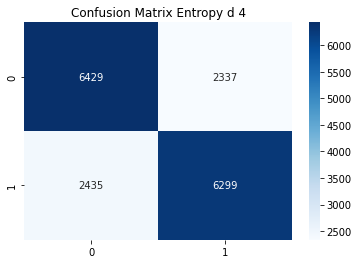

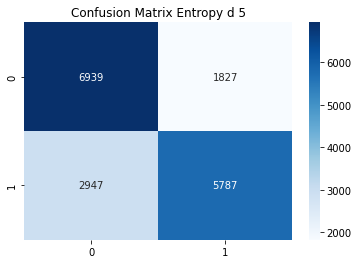

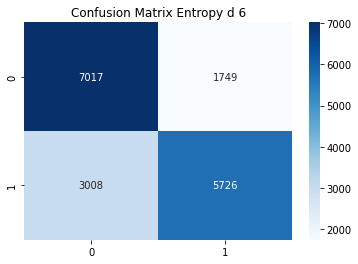

In [17]:
#mdr = 4,5,6
mdr = list(range(4, 7))
#confusion matric for different ds are calculated(ENTROPY).
cf_matrix = []
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
    Y_p_ent = entropy.predict(X_test)
    cf_matrix = confusion_matrix(y_test,Y_p_ent)


    gl = ["True Negative","False Positive","False Negative","True Positive"]

    gcnt = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    gpercent = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    l = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(gl,gcnt,gpercent)]
    l = np.asarray(l).reshape(2,2)
    plt.title("Confusion Matrix Entropy d "+str(d))
    sns.heatmap(cf_matrix, annot=True, fmt='' ,cmap='Blues')
    plt.show()

In [18]:
mdr = list(range(4, 7))# max depth range 4,5,6

#Classification Report for differnet d's (ENTROPY)
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
    Y_p_ent = entropy.predict(X_test)
    print("Classification Report for d ",d)
    print(classification_report(y_test,Y_p_ent))

Classification Report for d  4
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      8766
           1       0.73      0.72      0.73      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500

Classification Report for d  5
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8766
           1       0.76      0.66      0.71      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500

Classification Report for d  6
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      8766
           1       0.77      0.66      0.71      8734

    accuracy                           0.73     17500
   macro avg       0.73      0.73  

In [29]:
#mdr = 4,5,6
mdr = list(range(4, 7))

#Decision Tree(GINI)
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
  
    tree.plot_tree(gini,filled = True);
    fig.savefig('gini'+str(d)+'.png')


In [30]:
##mdr = 4,5,6
mdr = list(range(4, 7))

#Decision Tree(ENTROPY)
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
   
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
   
    tree.plot_tree(entropy, filled = True);
    fig.savefig('entropy'+str(d)+'.png')    #Saving the image
    

# Naive Bayes (8 Points)


1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support).  [2 points]

acc score of Naive Bayes: 0.7132
AxesSubplot(0.125,0.125;0.62x0.755)

Classification Report for Naive Bayes 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      8766
           1       0.79      0.57      0.67      8734

    accuracy                           0.71     17500
   macro avg       0.73      0.71      0.71     17500
weighted avg       0.73      0.71      0.71     17500



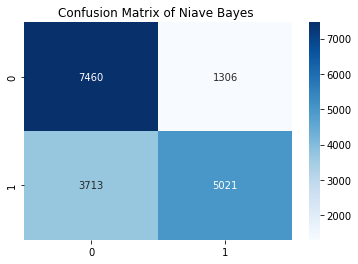

In [25]:
#Create a Gaussian Classifier
model = GaussianNB()

#model is trained using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

# how often is the classifier correct,Model accuracy?
print("acc score of Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

#Confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)

gl = ["True Negative","False Positive","False Negative","True Positive"]

gcnt = ['{0:0.0f}'.format(value) for value in
                    confusionmatrix.flatten()]
gpercent = ['{0:.2%}'.format(value) for value in
                         confusionmatrix.flatten()/np.sum(cf_matrix)]

plt.title("Confusion Matrix of Niave Bayes ")

#confusion matrix Graphics
cf = sns.heatmap(confusionmatrix, annot=True, fmt='' ,cmap='Blues')

print(cf)

#Classification report
print("\nClassification Report for Naive Bayes ")
print(classification_report(y_test,y_pred))

(array([35021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

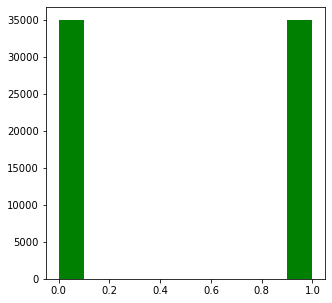

In [26]:
#Visualize the dataset for target varaible

#distribution of target variable 'Cardio' in the dataset.

plt.figure(figsize=(5,5))
plt.hist(df_dt['cardio'],color='green')

References

https://www.kaggle.com/general/189389

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://scikit-learn.org/stable/modules/naive_bayes.html

https://quantdare.com/decision-trees-gini-vs-entropy/